## Titanic- the movie and Titanic- the dataset

Growing up in India, Titanic was the first English movie that I would watch on cinema and it was an incredible experience. So it is fitting that I pick this really popular dataset for my first ML challenge.

Obviously in the movie, I was really sad that Jack ends up dying in the sea while Rose survives and lives on. This has haunted me ever since as I like happy endings!

Now armed with the data, I want to see if this was something dramatic and unfortunate as in the movie. Or will the data suggest that the odds were always against Jack and his death was inevitable!


## Import the train and test datasets

In [1]:
# import pandas and numpy for dealing with the data

import pandas as pd

import numpy as np

# Load the training data

train_data = pd.read_csv(r'C:\Users\Arun\Desktop\Kaggle Competitions\Titanic-Machine-Learning-from-Disaster\train.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# load the test data

test_data = pd.read_csv(r'C:\Users\Arun\Desktop\Kaggle Competitions\Titanic-Machine-Learning-from-Disaster\test.csv')

test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# Let us try to do some EDA, first let us explore the test data for null values

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are null values here for Cabin and Embarked

Some sort of imputation strategy is required, but we will have a look at it after some EDA

## Let us try to do some EDA and look for some trends**

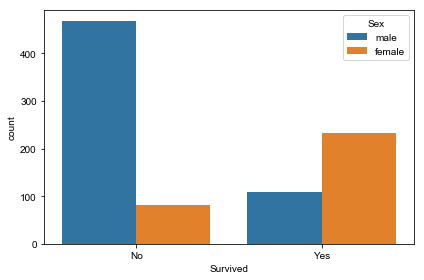

In [4]:
# some old conspiracy theories to examine for us

# appararently there is a better chance for survival if you were female

# let us see if this is true

# we will need matplot lib and seaborn to visualize this trend

import matplotlib.pyplot as plt

import seaborn as sns

#Use command below to show the charts in the same page on Jupyter notebook

%matplotlib inline

# let us use seaborn's countplot to plot this quickly

sns.countplot(x='Survived', hue='Sex', data=train_data)

#Change 0 and 1 x-labels to 'No' and 'Yes'

plt.xticks([0,1], ['No', 'Yes'])

#Use seaborn as style sheet for charts

plt.style.use('seaborn')

#set figure size

from pylab import rcParams

rcParams['figure.figsize'] = 12, 9

plt.tight_layout()

plt.show()


In [5]:
#  Obviously we can see that there are a lot more female survivors

# but chart above is still not really very illustrative

# we would be better off normalizing and finding out % survival among males and females

count_women = len (train_data[train_data['Sex']=='female'])

survived_women = len(train_data[(train_data['Sex']=='female') & (train_data['Survived']==1)])

survival_ratio_women = (survived_women/count_women)

# let us calculate the same for men

count_men = len (train_data[train_data['Sex']=='male'])

survived_men = len(train_data[(train_data['Sex']=='male') & (train_data['Survived']==1)])

survival_ratio_men = (survived_men/count_men)

print ("The chance of survival for men is :", survival_ratio_men)

print ("The chance of survival for women is :", survival_ratio_women)


The chance of survival for men is : 0.18890814558058924
The chance of survival for women is : 0.7420382165605095


EDA indicates that there is a almost 4 times better chance of a women on deck surviving than a man.

So the movie got it right, poor old Jack!

We also know that poor old Jack had a third class ticked and Rose had a first class ticket. Would this have influenced his chances?

Let us explore below

In [6]:
# first, let us check how many classes of tickets there were

train_data['Pclass'].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

The chance of survival for passengers in first class is : 0.6296296296296297
The chance of survival for passengers in second class is : 0.47282608695652173
The chance of survival for passengers in third class is : 0.24236252545824846


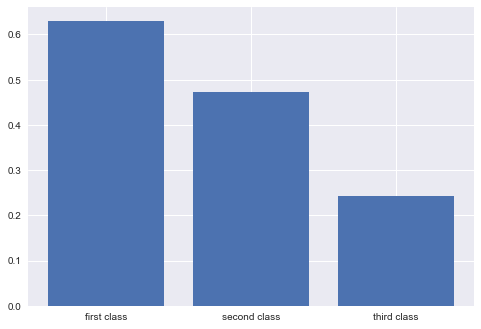

In [7]:
# okay, there are 3 classes

# let us calculate the survival chances by class

# we would be better off normalizing and finding out % survival among classes

count_class1 = len (train_data[train_data['Pclass']==1])

survived_class1 = len(train_data[(train_data['Pclass']==1) & (train_data['Survived']==1)])

survival_ratio_class1 = (survived_class1/count_class1)

# let us calculate the same for class 2

count_class2 = len (train_data[train_data['Pclass']==2])

survived_class2 = len(train_data[(train_data['Pclass']==2) & (train_data['Survived']==1)])

survival_ratio_class2 = (survived_class2/count_class2)

# let us calculate the same for class 3

count_class3 = len (train_data[train_data['Pclass']==3])

survived_class3 = len(train_data[(train_data['Pclass']==3) & (train_data['Survived']==1)])

survival_ratio_class3 = (survived_class3/count_class3)

print ("The chance of survival for passengers in first class is :", survival_ratio_class1)

print ("The chance of survival for passengers in second class is :", survival_ratio_class2)

print ("The chance of survival for passengers in third class is :", survival_ratio_class3)

x = ['first class', 'second class', 'third class']

y=[survival_ratio_class1,survival_ratio_class2,survival_ratio_class3]

#Use command below to show the charts in the same page on Jupyter notebook

%matplotlib inline

#Use seaborn as style sheet for charts

plt.style.use('seaborn')

plt.bar(x,y)

plt.show()


Again, the odds are stacked against Jack. A significantly lower survival ratio if you got a third class ticket

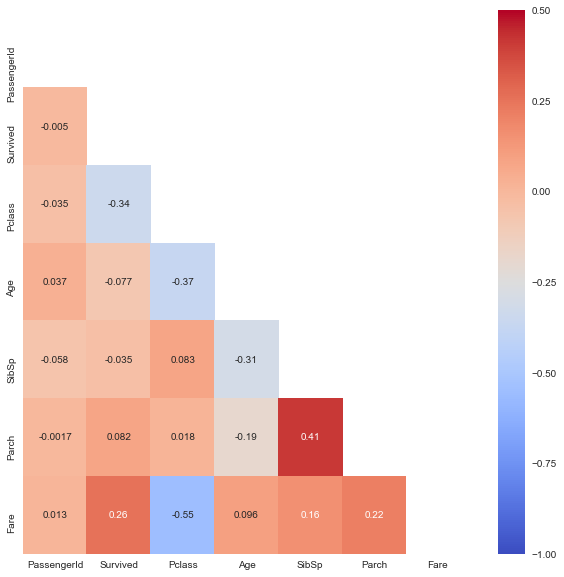

In [8]:
# let us also try a correlation plot from seaborn

plt.figure(figsize=(10,10))

# following part of script is to create a mask to take off duplicate part of the correlation matrix

corr = np.corrcoef(np.random.randn(7, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

  sns.heatmap(train_data.corr(),vmin=-1,vmax=0.5,cmap='coolwarm',annot=True, mask=mask)


As we can see, a negative correlation between age and survival chances

and a strong correlation between survival chances and fare (substituted to class of travel)

## Feature Enginnering with the Pipeline architecture

We will now begin to do feature engineering and prepare the data for our ML models

Best practice of doing this is through Scikit learn pipelines and we will start with a pipeline for imputing missing values

In [9]:
# let us check whch of the columns have null values in the train data

null_columns=train_data.columns[train_data.isnull().any()]

train_data[null_columns].isnull().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

In [10]:
# we will also drop the ticket, cabin & name column as these are simply text values

# and hence very unlikely to infer survival chances

# also drop 'survived' as this will be the labels in our model

train_data3=train_data.drop(columns=['Cabin','Ticket','Name','Survived'])

# see if this has gone through

train_data3.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [11]:
# let us first check the data types in the train features data

train_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [12]:
#let us first convert the two object columns into categories

# use a for loop to convert all of these columns into categoris

train_data5 = train_data3.select_dtypes(include='object')

columns_obj_train= train_data5.columns

for col in columns_obj_train:
    train_data3[col] = train_data3[col].astype('category')
    
# has the converson happened
    
train_data3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null category
dtypes: category(2), float64(2), int64(4)
memory usage: 43.8 KB


In [13]:
# we will use the Simple Imputer for  imputation

# let us first bring all the necessary pipeline transformer

# the numerical data, we will also scale for the use of some of our ML models

# the categorical data, we will also need to do one hot encoding

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder

numeric_transformer = Pipeline(steps=[('imputer',SimpleImputer(missing_values=np.nan, strategy='median') ),('scaler',StandardScaler())])

categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [14]:
# Next we will use the ColumnTransformer to apply all the feature engineering very neatly and in a single step

# a good guide on how to do this with categorical tranfromer as in https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf

# Before building this we will create two lists of the numeric and categorical columns using the pandas dtype method

numeric_features = train_data3.select_dtypes(include=['int64', 'float64']).columns

categorical_features = train_data3.select_dtypes(include=['category']).columns 

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

## Building ML models with Scikit learn pipelines

In [15]:
# now while actually running a model we can run the pre-processing step above as just one part of a pipeline

# first let us bring the features and labels

X = train_data3

y = train_data['Survived']

# let us import train test split

from sklearn.model_selection import train_test_split

# Split data into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.3,random_state= 1)

In [23]:
# Let us bring a few basic models and decide on which one's to take forward

# i generally like  to loop over a few basic models and then select one or two for further work

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import cross_val_score

# Let us instantiate individual classifers

SEED=123

lr = LogisticRegression(random_state=SEED,solver='liblinear')
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)
gaussian_nb= GaussianNB() 
randomforest=RandomForestClassifier(random_state=SEED)



# Define a list called classifier that contains the tuples (classifier_name, classifier)

classifiers = [('Logistic Regression', lr),('K Nearest Neighbours', knn),('Classification Tree', dt),('Guassian Naive Bayes', gaussian_nb),('Random Forest', randomforest)]

In [24]:
# Iterate over the defined list of tuples containing the classifiers

for clf_name, clf in classifiers:
    
# create the full pipeline to the training set

   pipe = Pipeline(steps=[('preprocessor', preprocessor),('classifier',  clf)])

   pipe.fit(X_train, np.ravel(y_train))
    
# Predict the labels of the test set

   y_pred = pipe.predict(X_test)
           
# Evaluate accuracies using cross_val_score
      
   cv_scores = cross_val_score(pipe,X,np.ravel(y),cv=5).mean()
          

# print the cv_scores for each classifier
  
   print('{:s} : {:.3f}'.format(clf_name,  cv_scores))

Logistic Regression : 0.786
K Nearest Neighbours : 0.799
Classification Tree : 0.765
Guassian Naive Bayes : 0.789


C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest : 0.793


## Hyperparameter tuning of the best models

While the KNN is our best model, I found out that the random forest model will seriously improve our performance if we went on a hyperarameter run.

I will run a randomized grid search below and I would recommend this over Grid Search anyday, as Grid Search can be really wasteful! 

In [21]:
# import randomized search for hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV

rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),('classifier',  randomforest)])

# set the important parameters for random forest

# n_etimators will increase the number of trees built and bring in more diversity and a better model

# max_features, decreasing this limit from one will make the number of features low at every tree and bring more diversity in each tree output or less correlated trees

# n_jobs = -1 to use all CPU Cores (should be used within random search cv)

# max_depth to be limited to restrict over fitting and for model to finish quickly

# use random state to repeat the results

rf_param_grid = {'classifier__n_estimators': np.arange(100,1000,100),'classifier__max_features': np.arange(0.05,1.05,.05),'classifier__max_depth':np.arange(4,8,1)}

grid_mse_rf = RandomizedSearchCV(estimator=rf_pipe,param_distributions=rf_param_grid,n_iter= 25, cv=4, verbose=1,n_jobs=-1, random_state=123)

# Fit randomized_mse to the data

grid_mse_rf.fit(X_train, np.ravel(y_train))

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse_rf.best_params_)

print("Highest score: ", np.sqrt(np.abs(grid_mse_rf.best_score_)))

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   38.7s finished


Best parameters found:  {'classifier__n_estimators': 600, 'classifier__max_features': 0.6000000000000001, 'classifier__max_depth': 7}
Highest score:  0.9214755422472545


As you can see, we achived a 92% accuracy on the titanic dataset! which is really cool

Let us go ahead and make predictions on the test dataset

## Making Predictions on the test data

In [22]:
# we have already loaded the test data to test_data dataframe

# let us drop the columns we dropped in the train data i.e. name, ticket and cabin

test_data3= test_data.drop(columns=['Name','Ticket','Cabin'])

# time to make predictions

pred = grid_mse_rf.predict(test_data3)

# now let us put this into the kaggle submission format

rf_output=pd.DataFrame({'PassengerId':test_data.index, 'Survived': pred}) 

rf_output


,PassengerId,Survived
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
413,413,0
414,414,1
415,415,0
416,416,0
